<span style="font-size: 280%;color:#1155cc"> Prosta regresja z PyTorch od guru99

<span style="font-size: 150%;color:Red"> 16.09.2020

https://www.guru99.com/pytorch-tutorial.html

<span style="font-size: 150%;color:#1155cc"> Krok 1. Definiowanie modelu sieci

Nasz model sieci to prosta warstwa liniowa o kształcie wejściowym i wyjściowym równym 1.
Ponieważ jest jeden wynik i jedna zmienna można zrobić wykres rozproszenia dwu wymiarowy.

In [1]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer = torch.nn.Linear(1,1,1) # jedna warstwa zewnętrzna , jedna ukryta i jedna wynikowa

    def forward(self, x):
        x = self.layer(x)      
        return x

net = Net()
print(net)

Net(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)


<span style="font-size: 150%;color:#1155cc"> Krok 2. Wgrywam dane

In [3]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('/media/wojciech/D6DE33C1DE3399271/1A/WorldHappinessReport.csv')
# usecols=[1,2,3,4,5]
df.head(3)


,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015.0
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015.0
2,2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015.0


<span style="font-size: 150%;color:#1155cc"> Kork 3.  ELiminuje puste komórki NaN z danych

In [4]:
df = df.dropna(how ='any')
df.isnull().sum()

Unnamed: 0                       0
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

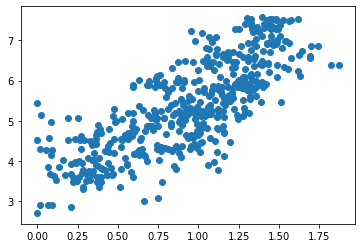

In [5]:
X = df['Economy (GDP per Capita)']
y = df['Happiness Score']
plt.scatter(X, y)


Przed rozpoczęciem procesu szkolenia musisz przekonwertować tablicę numpy na zmienne obsługiwane przez Torch i autograd

In [6]:
X = torch.tensor((X), dtype=torch.float)
y = torch.tensor((y), dtype=torch.float)

Przetransformowanie x i y do postaci wektorów.

In [7]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X

tensor([[0.3198],
        [0.8787],
        [0.9393],
        [0.7578],
        [1.0535],
        [0.7682],
        [1.3336],
        [1.3372],
        [1.0239],
        [1.3238],
        [0.3975],
        [1.0319],
        [1.3078],
        [0.2867],
        [0.7704],
        [0.6813],
        [0.8322],
        [0.9936],
        [0.9812],
        [1.0122],
        [0.2581],
        [0.0153],
        [0.4604],
        [0.4225],
        [1.3263],
        [0.0785],
        [0.3419],
        [1.1071],
        [0.8901],
        [0.9186],
        [0.2391],
        [0.6787],
        [0.0000],
        [0.9558],
        [1.0825],
        [1.2081],
        [1.1790],
        [1.3255],
        [0.4403],
        [0.8954],
        [0.8640],
        [0.8818],
        [0.7645],
        [1.1517],
        [0.1907],
        [1.2902],
        [1.2778],
        [1.0602],
        [0.7419],
        [1.3279],
        [0.5456],
        [1.1541],
        [0.7455],
        [0.1742],
        [0.2667],
        [0

<span style="font-size: 150%;color:#1155cc"> Krok 4. Algorytm optymalizacji: Stochastyczny spadek gradientu (SGD)

In [8]:
learning_rate  =  0.05


optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = torch.nn.MSELoss()

<span style="font-size: 150%;color:#1155cc"> Step 5. Training
    
Teraz zacznijmy nasz proces szkolenia. W epoce 250 powtórzysz nasze dane, aby znaleźć najlepszą wartość dla naszych hiperparametrów.

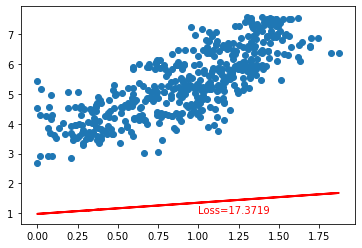

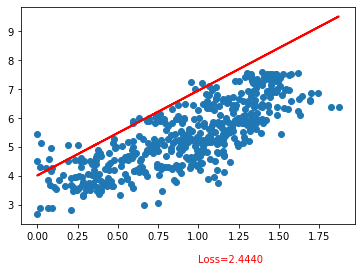

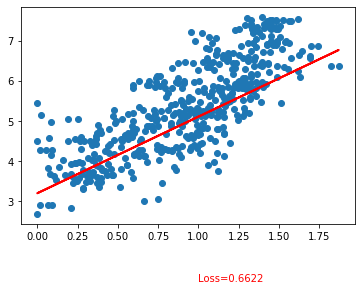

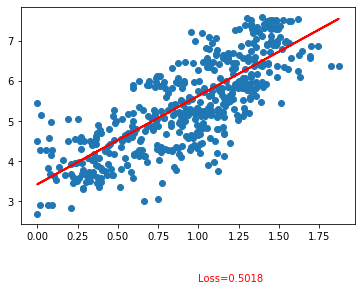

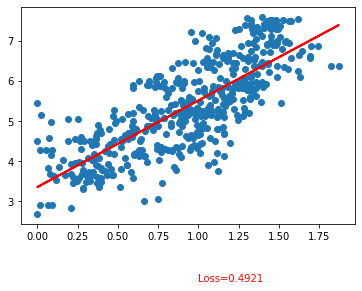

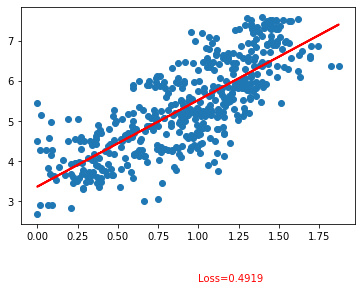

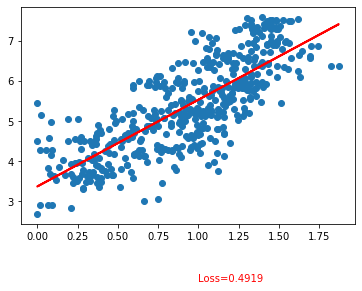

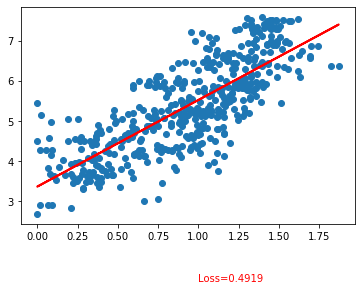

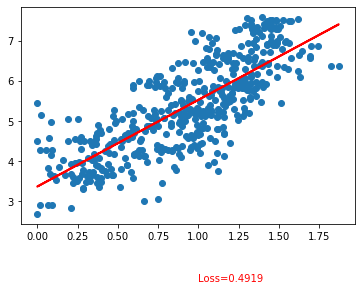

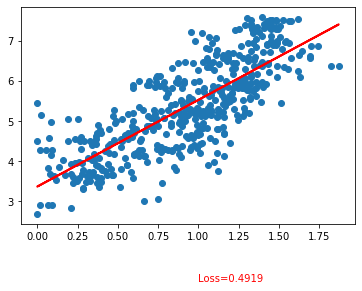

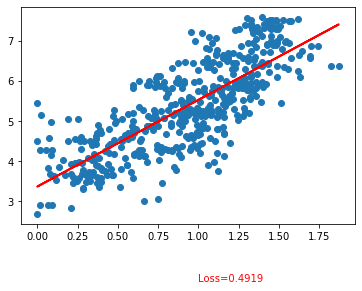

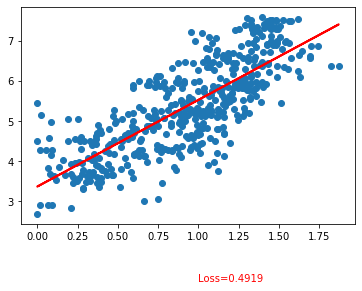

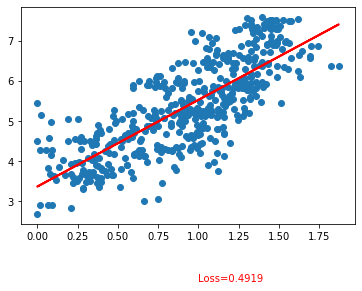

In [9]:
inputs = Variable(X)
outputs = Variable(y)
for i in range(250):
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 20 == 0:
       # plot and show learning process
       plt.cla()
       plt.scatter(X.data.numpy(), y.data.numpy())
       plt.plot(X.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
       plt.text(1, 1, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
       plt.pause(0.1)

plt.show()